In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.image as img
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

In [3]:
DATASET_PATH = 'train.csv'

In [4]:
train_df = pd.read_csv(DATASET_PATH)
train_df.head()  # Проверка корректности импорта.

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [6]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [7]:
train_df.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

## Задание 1.
Построить график распределения целевой переменной. Сделать выводы.

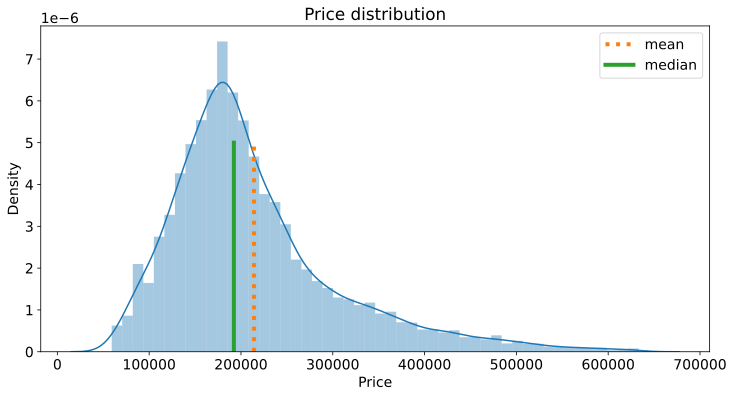

In [8]:
rcParams["figure.figsize"] = 12, 6

target_mean = round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()

sns.distplot(train_df['Price'], bins=50)
y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linewidth=4)

plt.title('Price distribution')
plt.legend()

Разброс цен примерно соответствует форме кривой нормального распределения. Максимальное количество предложений стОит в районе 180000. Среднее значение смещено в сторону бОльших цен. Медиана находится ближе к максимальному кол-ву предложений (180000).

## Задание 2.

Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.

2. Square

(array([1.300e+01, 3.200e+01, 1.632e+03, 3.294e+03, 2.379e+03, 1.274e+03,
        9.580e+02, 2.150e+02, 9.100e+01, 5.800e+01, 2.500e+01, 4.000e+00,
        6.000e+00, 8.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.1368588,  13.935426 ,  26.733992 ,  39.53256  ,  52.331123 ,
         65.12969  ,  77.92826  ,  90.72682  , 103.52539  , 116.32396  ,
        129.12253  , 141.9211   , 154.71965  , 167.51822  , 180.31679  ,
        193.11536  , 205.91393  , 218.7125   , 231.51106  , 244.30962  ,
        257.1082   , 269.90677  , 282.70532  , 295.50388  , 308.30246  ,
        321

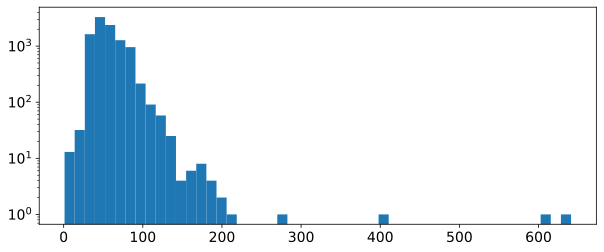

In [9]:
rcParams["figure.figsize"] = 10, 4

plt.hist(train_df['Square'], bins=50, log=True)

Похоже, что до 200 кв (возможно до 150 кв даже) общая площадь квартиры - это нормально, все что выше 200 (150) - нужно детально изучать (смотреть на другие показатели)

.

3. LifeSquare

(array([2.050e+02, 7.110e+02, 2.202e+03, 2.074e+03, 1.505e+03, 5.090e+02,
        3.130e+02, 1.580e+02, 1.110e+02, 3.700e+01, 2.400e+01, 1.000e+01,
        9.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500.], dtype=float32),
 <BarContaine

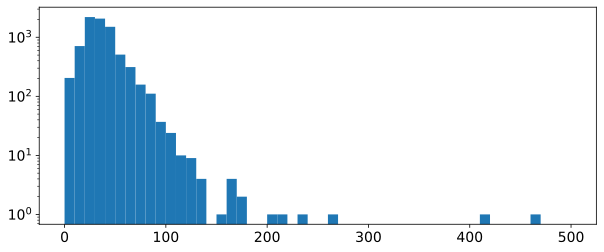

In [10]:
plt.hist(train_df['LifeSquare'], bins=50, range=(0, 500), log=True)

В гистограмму не вошли данные с NaN, большее количество значений - это жилые площади до 150 кв. Несколько ячеек - площади от 150 до 300 кв. С ними надо разбираться подробнее. И неадекват - 3 ячейки, площадь свыше 7к, 420 и 460.

.

4. KitchenSquare

(array([9.952e+03, 2.100e+01, 1.300e+01, 7.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

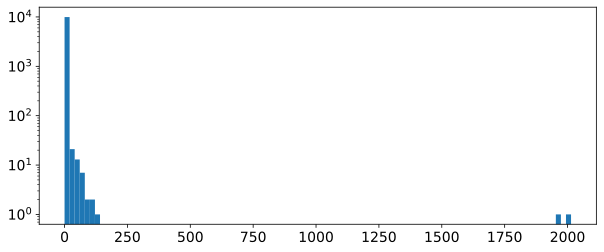

In [11]:
plt.hist(train_df['KitchenSquare'], bins=100, log=True)

Основная часть значений площадей кухни до 20 кв. Свыше 20 кв имеется порядка 46 значений, их рассмотреть подробнее на адекватность.

.

(array([1., 3., 1., 0., 0., 2., 1., 1., 0., 0., 1., 2., 1., 2., 0., 0., 0.,
        1., 1., 0., 2., 0., 1., 0., 1., 2., 1., 2., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 2., 0., 0., 1., 1., 0., 0., 0., 0., 2., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([ 21.  ,  21.79,  22.58,  23.37,  24.16,  24.95,  25.74,  26.53,
         27.32,  28.11,  28.9 ,  29.69,  30.48,  31.27,  32.06,  32.85,
         33.64,  34.43,  35.22,  36.01,  36.8 ,  37.59,  38.38,  39.17,
         39.96,  40.75,  41.54,  42.33,  43.12,  43.91,  44.7 ,  45.49,
         46.28,  47.07,  47.86,  48.65,  49.44,  50.23,  51.02,  51.81,
         52.6 ,  53.39,  54.18,  54.97,  55.76,  56.55,  57.34,  58.13,
         58.92,  59.71,  60.5 ,  61.29,  62.08,  62.87,  63.66,  64.45,
         65.24,  66.03,  66.82,  67.61,  68.4 

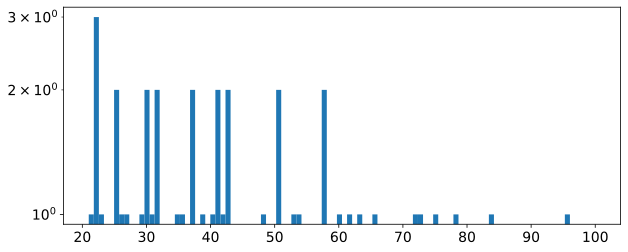

In [12]:
plt.hist(train_df['KitchenSquare'], bins=100, range=(21, 100), log=True)

Сильный разброс площадей кухни (что свыше 20 кв), либо редко встречаются такие планировки квартир, либо это неадекватные данные.

.

5. Floor

(array([  0., 235., 588., 872., 949., 876., 802., 759., 643., 604., 553.,
        457., 438., 398., 362., 287., 290., 256., 185., 121.,  68.,  59.,
         54.,  25.,  53.,  34.,  18.,   5.,   3.,   0.,   0.,   1.,   2.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

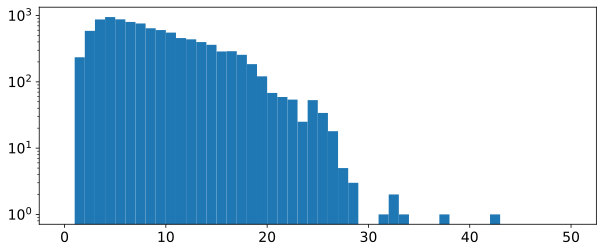

In [13]:
plt.hist(train_df['Floor'], bins=50, range=(0, 50), log=True)

Основная часть этажей, на котором находится квартира до 29. Свыше 29 - изучить.

6. HouseFloor

(array([2.690e+02, 4.970e+02, 4.800e+01, 1.270e+02, 1.340e+02, 1.031e+03,
        5.800e+01, 5.900e+01, 1.410e+02, 1.389e+03, 1.350e+02, 2.800e+01,
        1.074e+03, 2.700e+01, 6.250e+02, 1.230e+02, 5.760e+02, 2.331e+03,
        8.900e+01, 1.080e+02, 1.050e+02, 3.300e+01, 3.430e+02, 4.000e+01,
        1.760e+02, 3.740e+02, 1.000e+00, 6.000e+00, 3.000e+00, 1.000e+00,
        2.100e+01, 1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.],
       dtype=float32),
 <BarContainer object of 50 artists>)

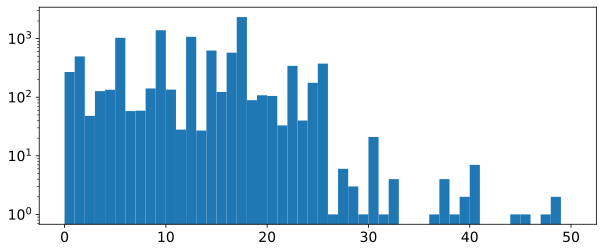

In [14]:
plt.hist(train_df['HouseFloor'], bins=50, range=(0, 50), log=True)

Основная часть домов имеет до 25 этажей. Нужно изучить, есть ли в этой местности дома с этажностью свыше 25 этажей. Если есть, то их сильно меньше.

6.1. Вспомним тот факт, что случаев когда HouseFloor больше Floor насчитали 1825 ячейки. Посмртрим на графике эти ячейки.

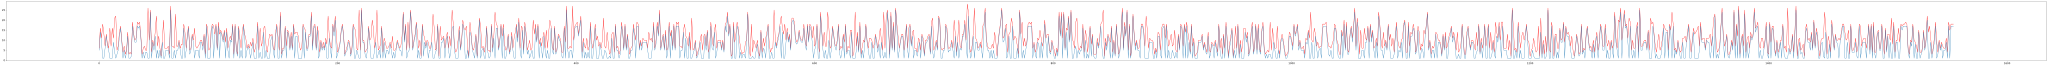

In [15]:
df_house_floor = train_df.query('(HouseFloor < Floor)')[['HouseFloor', 'Floor']]
df_house_floor = df_house_floor[df_house_floor['HouseFloor'] != 0]
df_house_floor.reset_index(inplace=True)

rcParams["figure.figsize"] = 200, 6
plt.plot(df_house_floor['Floor'], color='red')
plt.plot(df_house_floor['HouseFloor'])

Интересная тенденция ,что красная линия (этаж) идет выше и плавно огибает синюю (этажность). Возможно для этих ячеек просто перепутали значения (этаж-этажность), когда заполняли базу. 

7. HouseYear

(array([  16.,   13.,   45.,   34.,  851., 1817., 3717.,  755.,  913.,
        1837.]),
 array([1910., 1921., 1932., 1943., 1954., 1965., 1976., 1987., 1998.,
        2009., 2020.]),
 <BarContainer object of 10 artists>)

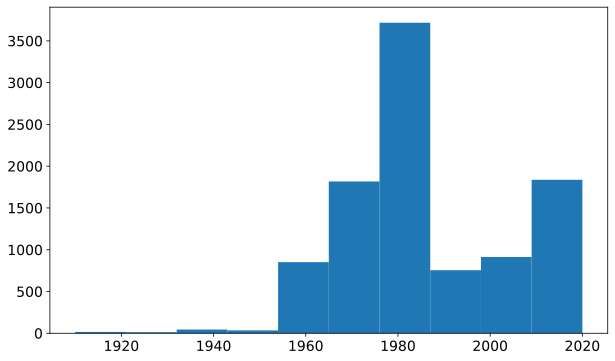

In [16]:
rcParams["figure.figsize"] = 10, 6

train_df = train_df[train_df['HouseYear'] < 2021]
plt.hist(train_df['HouseYear'])

С возрастом домов все в порядке. Застройка начала расти с 60-х годов, в 80-х был пик. Упала застройка к 90-м, а в с 2010 снова пошел активный рост застройки.

8. Ecology

(array([2713., 1424., 1228.,  502.,  446.,  494.,  493.,  338.,  432.,
         674.,  144.,  333.,  180.,   58.,  169.,   16.,  195.,   98.,
          22.,   39.]),
 array([0.        , 0.02609335, 0.05218671, 0.07828005, 0.10437341,
        0.13046676, 0.15656011, 0.18265346, 0.20874682, 0.23484017,
        0.26093352, 0.28702688, 0.31312022, 0.33921358, 0.3653069 ,
        0.39140028, 0.41749364, 0.44358698, 0.46968034, 0.49577367,
        0.52186704], dtype=float32),
 <BarContainer object of 20 artists>)

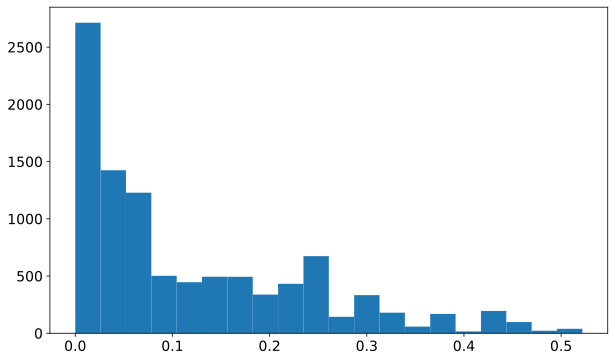

In [30]:
plt.hist(train_df['Ecology_1'], bins=20)

Много квартир с низким показателем экологии, от 0 до 0,08. Примерно столько же вариантов со средними показателями эгологии 0,08...0,26. И совсем немного квартир с высоким показателем экологии.

<AxesSubplot:xlabel='Ecology_3'>

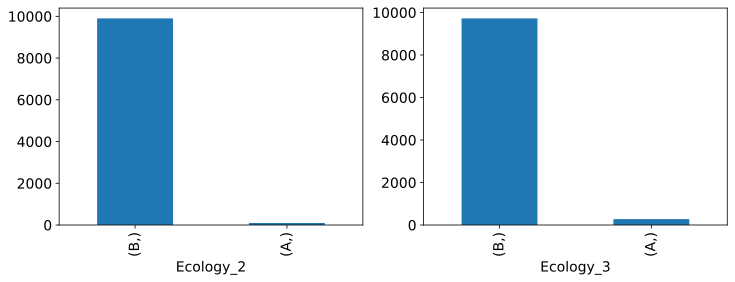

In [37]:
plt.figure(figsize = (12, 4))

plt.subplot(121)
train_df[['Ecology_2']].value_counts().plot(kind='bar')

plt.subplot(122)
train_df[['Ecology_3']].value_counts().plot(kind='bar')


Ecology_3 почти полностью повторяет предыдущий параметр Ecology_2

9. Social_1

(array([855., 688., 150., 528., 392.,  62., 237., 138.,  40.,  46., 174.,
         96., 210.,  50., 574., 434., 761., 127., 295.,  70., 707.,  87.,
        563., 200., 209., 269., 159.,  83., 129., 238.,   0., 422.,   0.,
        174.,   0., 556.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         99.,   0.,   0.,   0.,   0., 176.]),
 array([ 0.  ,  1.48,  2.96,  4.44,  5.92,  7.4 ,  8.88, 10.36, 11.84,
        13.32, 14.8 , 16.28, 17.76, 19.24, 20.72, 22.2 , 23.68, 25.16,
        26.64, 28.12, 29.6 , 31.08, 32.56, 34.04, 35.52, 37.  , 38.48,
        39.96, 41.44, 42.92, 44.4 , 45.88, 47.36, 48.84, 50.32, 51.8 ,
        53.28, 54.76, 56.24, 57.72, 59.2 , 60.68, 62.16, 63.64, 65.12,
        66.6 , 68.08, 69.56, 71.04, 72.52, 74.  ]),
 <BarContainer object of 50 artists>)

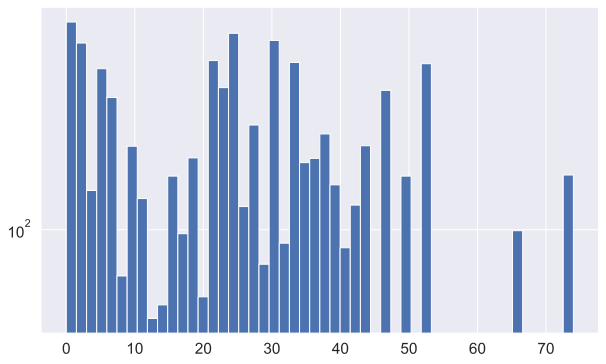

In [103]:
plt.hist(train_df['Social_1'], bins=50, log=True)

(array([1054.,  639.,   17.,  913.,  238.,  108.,  151.,  124.,  210.,
         301.,  109.,  378.,  508.,  383.,  834.,  475.,  515.,  229.,
         358.,  348.,  390.,   89.,  100.,    0.,  147.,    0.,  260.,
         257.,    0.,  253.,    0.,   79.,    0.,    0.,    0.,  204.,
           0.,    0.,  151.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  176.]),
 array([  168. ,   546.3,   924.6,  1302.9,  1681.2,  2059.5,  2437.8,
         2816.1,  3194.4,  3572.7,  3951. ,  4329.3,  4707.6,  5085.9,
         5464.2,  5842.5,  6220.8,  6599.1,  6977.4,  7355.7,  7734. ,
         8112.3,  8490.6,  8868.9,  9247.2,  9625.5, 10003.8, 10382.1,
        10760.4, 11138.7, 11517. , 11895.3, 12273.6, 12651.9, 13030.2,
        13408.5, 13786.8, 14165.1, 14543.4, 14921.7, 15300. , 15678.3,
        16056.6, 16434.9, 16813.2, 17191.5, 17569.8, 17948.1, 18326.4,
        18704.7, 19083. ]),
 <BarContainer object of 50 artists>)

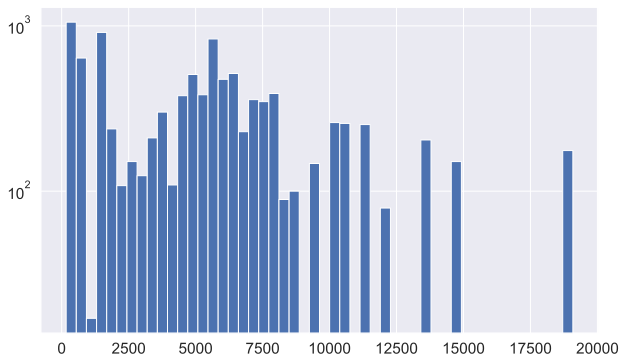

In [104]:
plt.hist(train_df['Social_2'], bins=50, log=True)

(array([5493., 2362.,  777.,  505.,   97.,  100.,   22.,   19.,   55.,
          59.,    0.,    0.,    0.,   18.,    0.,    9.,    0.,   58.,
           0.,   49.,   25.,    0.,    0.,    0.,    0.,   10.,    0.,
           0.,    0.,   43.,   27.,    0.,   25.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  245.]),
 array([  0.  ,   2.82,   5.64,   8.46,  11.28,  14.1 ,  16.92,  19.74,
         22.56,  25.38,  28.2 ,  31.02,  33.84,  36.66,  39.48,  42.3 ,
         45.12,  47.94,  50.76,  53.58,  56.4 ,  59.22,  62.04,  64.86,
         67.68,  70.5 ,  73.32,  76.14,  78.96,  81.78,  84.6 ,  87.42,
         90.24,  93.06,  95.88,  98.7 , 101.52, 104.34, 107.16, 109.98,
        112.8 , 115.62, 118.44, 121.26, 124.08, 126.9 , 129.72, 132.54,
        135.36, 138.18, 141.  ]),
 <BarContainer object of 50 artists>)

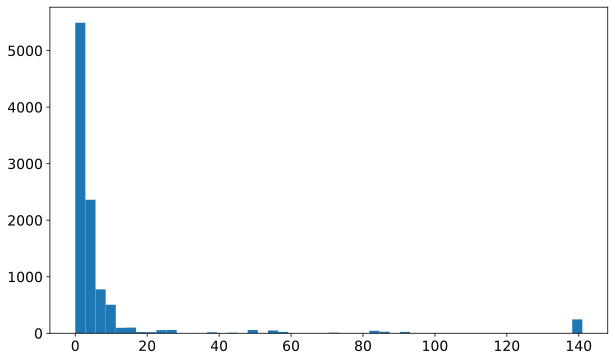

In [23]:
plt.hist(train_df['Social_3'], bins=50)

По социалкам ничего не понятно. Есть пробелы в данных перед максимальными значениями.

10. Healthcare

<AxesSubplot:>

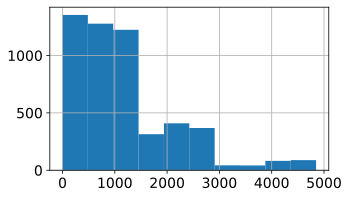

In [84]:
plt.figure(figsize = (5, 3))
train_df[~train_df['Healthcare_1'].isnull()].Healthcare_1.hist()

По показателю Healthcare (4798 NaN) - те что не NaN, до 1500 много квартир, между 1500 и 3000 среднее количество квартир, и мало свыше 3000 по показателю Healthcare.

<AxesSubplot:>

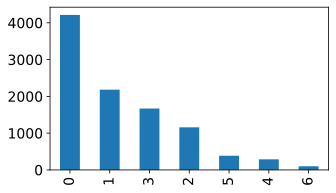

In [86]:
plt.figure(figsize = (5, 3))
train_df['Helthcare_2'].value_counts().plot(kind='bar')

Показатель Helthcare_2 равен 0 у почти 4300 ячееек, потом чем выше показатель, тем меньше количество квартир (ячеек) соответствуют ему.И порядка 150 квартир имеют наивысший показатель Helthcare_2

11. Shops

<AxesSubplot:>

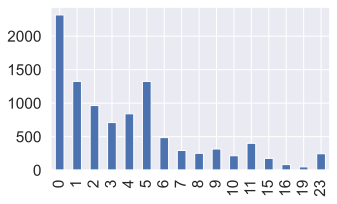

In [107]:
plt.figure(figsize = (5, 3))
train_df['Shops_1'].value_counts().sort_index().plot(kind='bar')

Сложно сказать что происходит с магазинами.

Похоже что вариантов квартир, где близко нет магазинов - 2300 и тд.

<AxesSubplot:>

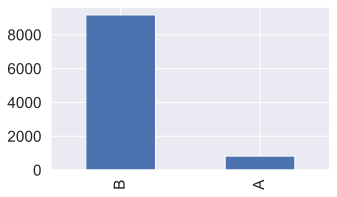

In [108]:
plt.figure(figsize = (5, 3))
train_df['Shops_2'].value_counts().plot(kind='bar')
# train_df['Shops_2'].value_counts()

Что бы это значило...

## Задание 3.


Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

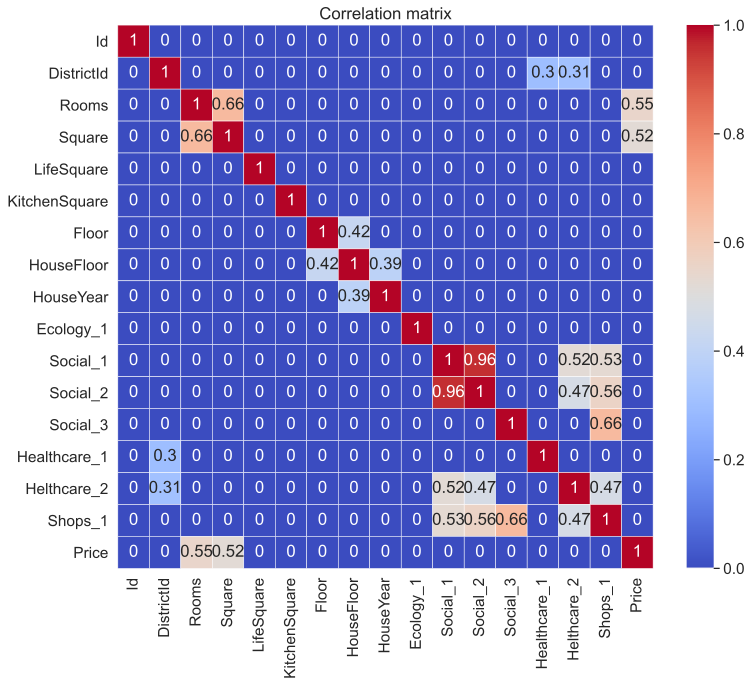

In [100]:
plt.figure(figsize=(12, 10))
# sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Выводы по корреляции признаков.
1. Количество комнат связано с общей площадью квартиры.
2. Принадлежность квартиры к району, влияет на показатели Healthcare.
3. Цена зависит от количества комнат и площади. (можно ли выкинуть один из признаков безболезненно?)
4. Этажность зависит от года постройки.
5. Этажность связана с этажом квартиры.
6. Social_1 и Social_2 сильно связаны (можно ли выкинуть один?)
7. Социалочка связана с наличием магазинов и Healthcare.
8. Healthcare связан с магазинами.

Интересно почему социалочка не связана с районом квартиры.

Почему на цену влияет только площадь, похоже остальные признаки не так явно влияют на цену.